In [1]:
#Import necessary modules

import numpy as np
import matplotlib.pyplot as plt
import datetime


In [2]:
"""
Read data from csv files
Input: (file_path), files to be read
Output: (Products) (Transactions) (Returns), Organized data from files
"""

def read_products(file_path):
    products = {} #Empty list
    with open(file_path, 'r') as file:
        next(file) #Skips the header
        for line in file:
            if line.strip():
                product_id, product_name, price = line.strip().split(',')
                products[product_id] = {'name': product_name, 'price': float(price)}
    return products

def read_transactions(file_path):
    transactions = [] #Empty dictionary
    with open(file_path, 'r') as file:
        next(file) #Skips the header
        for line in file:
            if line.strip():
                trans_id, date_str, product_id, quantity, discount = line.strip().split(',')
                transactions.append({
                    'id': trans_id,
                    'date': datetime.datetime.strptime(date_str, '%Y-%m-%d'),
                    'product_id': product_id,
                    'quantity': int(quantity),
                    'discount': float(discount)
                })
    return transactions

def read_returns(file_path):
    returns = [] #Empty dictionary
    with open(file_path, 'r') as file:
        next(file) #Skips the header
        for line in file:
            if line.strip():
                return_id, date_str = line.strip().split(',')
                returns.append({
                    'id': return_id,
                    'date': datetime.datetime.strptime(date_str, '%Y-%m-%d')
                })
    return returns

products = read_products("transactions_Products_January.csv")
transactions = read_transactions("transactions_Sales_January.csv")
returns = read_returns("transactions_Returns_January.csv")

In [3]:
"""
Calculate data related to the discount policy before and after January 8th
Input: N/A
Output: (avg_discount_before_jan_8) and (avg_discount_after_jan_8), average discount percentage for before and after Jan 8th
"""

before_jan_8_discounts = [] #Empty list for before jan 8
after_jan_8_discounts = [] #Empty list for after jan 8

for transaction in transactions:
    if transaction['date'] < datetime.datetime(2024, 1, 8): #Checks to see if the date is before jan 8
        before_jan_8_discounts.append(transaction['discount'])
    else:
        after_jan_8_discounts.append(transaction['discount'])

avg_discount_before_jan_8 = np.mean(before_jan_8_discounts) * 100 #uses numpy to calculate the mean discount then multiply by 100 to get the percentage
avg_discount_after_jan_8 = np.mean(after_jan_8_discounts) * 100

print(f"Average transactions without discount before Jan 8th: {avg_discount_before_jan_8:.2f}%")
print(f"Average transactions without discount after Jan 8th: {avg_discount_after_jan_8:.2f}%")

Average transactions without discount before Jan 8th: 9.41%
Average transactions without discount after Jan 8th: 7.39%


In [4]:
"""
Busiest day of the week
Input: N/A
Output: (busiest_day), the busiest day of the week with 0 being Monday and 6 Sunday
"""

weekday_transactions = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: []} # 0 - Monday, 6 - Sunday

for transaction in transactions:
    weekday_transactions[transaction['date'].weekday()].append(transaction) #Uses the datetime module to check if the date is a weekday

average_transactions_per_weekday = {weekday: len(transactions) / len(weekday_transactions[weekday]) for weekday, transactions in weekday_transactions.items()} #Calculation for average transactions
busiest_day = max(average_transactions_per_weekday, key=average_transactions_per_weekday.get) #Grabs the max value from the 'average_transactions_per_weekday' key

print(f"Busiest day of the week: {busiest_day} ( {len(weekday_transactions[busiest_day])} transactions)")


Busiest day of the week: 0 ( 257 transactions)


In [5]:
"""
Average number of transactions and amount per weekday
Input: N/A
Output: (average_sales_per_weekday), The sales amount and count per weekday
"""

weekday_sales = {weekday: {'count': 0, 'amount': 0} for weekday in range(7)}

for transaction in transactions: #Loop to grab teh weekday sales count and amounts
    weekday = transaction['date'].weekday()
    weekday_sales[weekday]['count'] += 1
    weekday_sales[weekday]['amount'] += (products[transaction['product_id']]['price'] * transaction['quantity']) * (1 - transaction['discount'])

average_sales_per_weekday = {weekday: sales['amount'] / sales['count'] for weekday, sales in weekday_sales.items()} #takes the sales amount and divides by the count to get the average sales per week


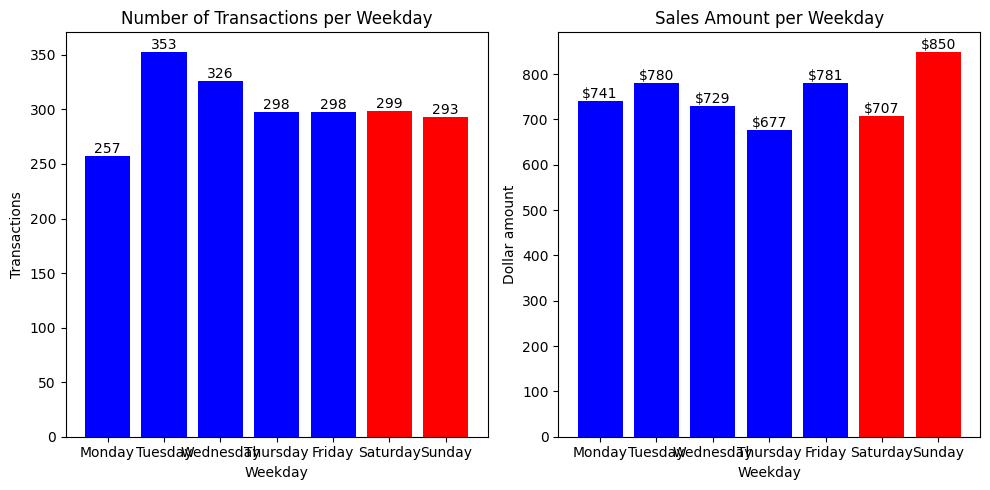

In [6]:
"""
Bar charts for transactions and sales amount per weekday
Input: N/A
Output: Bar chart with weekdays in the x axis and number of transactions in the y axis
"""

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transaction_counts = [len(weekday_transactions[i]) for i in range(7)]
sales_amounts = [average_sales_per_weekday[i] for i in range(7)]
colors = ['blue' if i < 5 else 'red' for i in range(7)]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(weekdays, transaction_counts, color=colors)
plt.title('Number of Transactions per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Transactions')
for i in range(7):
    plt.text(i, transaction_counts[i], str(transaction_counts[i]), ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.bar(weekdays, sales_amounts, color=colors)
plt.title('Sales Amount per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Dollar amount')
for i in range(7):
    plt.text(i, sales_amounts[i], f"${sales_amounts[i]:,.0f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [7]:
"""
Determine the most expensive day with regards to returns
Input: N/A
Output: (most_expensive_return_day), the most expensive day with regards to returns (total_return_cost), return of the most expensive day
"""

return_costs = {date: 0 for date in set(return_data['date'] for return_data in returns)}

for return_data in returns: #Loops over th e return data
    for transaction in transactions: #Loops over the transactions data
        if transaction['date'] == return_data['date']: #Checks to see if the dates match
            product_price = products[transaction['product_id']]['price']
            return_costs[return_data['date']] += (product_price * transaction['quantity']) * 0.1

most_expensive_return_day = max(return_costs, key=return_costs.get)
total_return_cost = return_costs[most_expensive_return_day]

print(f"The most expensive day in terms of returns: {most_expensive_return_day.strftime('%Y-%m-%d')}")
print(f"Total return cost on {most_expensive_return_day.strftime('%Y-%m-%d')}: ${total_return_cost:,.2f}")


The most expensive day in terms of returns: 2024-01-03
Total return cost on 2024-01-03: $31,515.00


In [8]:
"""
Creation of a text file for supplier orders
Input: N/A
Output: (order_supplier_January.txt) Text file with products, product ID's and how many to order
"""

ordered_items = {}

for transaction in transactions:
    if transaction['product_id'] not in ordered_items:
        ordered_items[transaction['product_id']] = transaction['quantity']
    else:
        ordered_items[transaction['product_id']] += transaction['quantity']

for return_data in returns:
    for transaction in transactions:
        if transaction['date'] == return_data['date']:
            ordered_items[transaction['product_id']] -= transaction['quantity']

with open("order_supplier_January.txt", 'w') as file:
    for product_id, quantity in sorted(ordered_items.items()):
        file.write(f"{product_id}#{products[product_id]['name']}#{quantity}\n")


In [9]:
"""
Searches and returns the products that were never sold
Input: N/A
Output: N/A
"""

sold_products = set(transaction['product_id'] for transaction in transactions)
unsold_products = {product_id: products[product_id]['name'] for product_id in products if product_id not in sold_products}

if unsold_products:
    print("Products that were never sold:")
    for product_id, product_name in unsold_products.items():
        print(f"{product_id} {product_name}")
else:
    least_sold_product_count = min(ordered_items.values())
    least_sold_products = {product_id: products[product_id]['name'] for product_id, count in ordered_items.items() if count == least_sold_product_count}
    sale_dates = {product_id: [] for product_id in least_sold_products}

    for transaction in transactions:
        if transaction['product_id'] in least_sold_products:
            sale_dates[transaction['product_id']].append(transaction['date'].strftime('%Y-%m-%d'))

    print("Least sold products:")
    for product_id, product_name in least_sold_products.items():
        print(f"{product_id} {product_name} ({least_sold_product_count} units) [", end="")
        print(", ".join(sale_dates[product_id]), end="]\n")


Least sold products:
P10 "10"" Tablet" (-91 units) [2024-01-02, 2024-01-02, 2024-01-02, 2024-01-03, 2024-01-03, 2024-01-03, 2024-01-03, 2024-01-04, 2024-01-04, 2024-01-04, 2024-01-04, 2024-01-04, 2024-01-04, 2024-01-04, 2024-01-05, 2024-01-05, 2024-01-05, 2024-01-05, 2024-01-05, 2024-01-06, 2024-01-06, 2024-01-06, 2024-01-06, 2024-01-06, 2024-01-07, 2024-01-07, 2024-01-07, 2024-01-07, 2024-01-08, 2024-01-09, 2024-01-09, 2024-01-09, 2024-01-09, 2024-01-09, 2024-01-09, 2024-01-09, 2024-01-09, 2024-01-10, 2024-01-10, 2024-01-10, 2024-01-11, 2024-01-11, 2024-01-12, 2024-01-12, 2024-01-12, 2024-01-12, 2024-01-13, 2024-01-14, 2024-01-14, 2024-01-15, 2024-01-15, 2024-01-16, 2024-01-16, 2024-01-17, 2024-01-17, 2024-01-18, 2024-01-18, 2024-01-19, 2024-01-20, 2024-01-20, 2024-01-21, 2024-01-21, 2024-01-21, 2024-01-22, 2024-01-22, 2024-01-23, 2024-01-23, 2024-01-24, 2024-01-24, 2024-01-24, 2024-01-24, 2024-01-24, 2024-01-24, 2024-01-25, 2024-01-25, 2024-01-25, 2024-01-26, 2024-01-28, 2024-01-29, 

Pearson correlation coefficient: -0.181086132349226


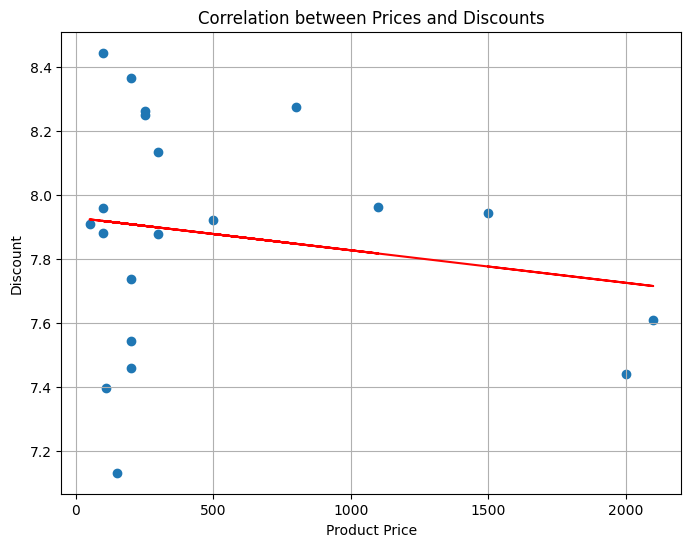

In [10]:
"""
Calculates the Pearson correlation coefficient as well plots a linear regression line
Input: N/A
Output: Linear regression plot with pearson correlation coeffiecient
"""

prices = [product['price'] for product in products.values()]
P1_discount=[]
P2_discount=[]
P3_discount=[]
P4_discount=[]
P5_discount=[]
P6_discount=[]
P7_discount=[]
P8_discount=[]
P9_discount=[]
P10_discount=[]
P11_discount=[]
P12_discount=[]
P13_discount=[]
P14_discount=[]
P15_discount=[]
P16_discount=[]
P17_discount=[]
P18_discount=[]
P19_discount=[]
P20_discount=[]
for transaction in transactions:
    if transaction['product_id'] == 'P1':
        P1_discount.append(transaction['discount'])
    if transaction['product_id'] == 'P2':
        P2_discount.append(transaction['discount'])
    if transaction['product_id'] == 'P3':
        P3_discount.append(transaction['discount'])
    if transaction['product_id'] == 'P4':
        P4_discount.append(transaction['discount'])
    if transaction['product_id'] == 'P5':
        P5_discount.append(transaction['discount'])
    if transaction['product_id'] == 'P6':
        P6_discount.append(transaction['discount'])
    if transaction['product_id'] == 'P7':
        P7_discount.append(transaction['discount'])
    if transaction['product_id'] == 'P8':
        P8_discount.append(transaction['discount'])
    if transaction['product_id'] == 'P9':
        P9_discount.append(transaction['discount'])
    if transaction['product_id'] == 'P10':
        P10_discount.append(transaction['discount'])
    if transaction['product_id'] == 'P11':
        P11_discount.append(transaction['discount'])
    if transaction['product_id'] == 'P12':
        P12_discount.append(transaction['discount'])
    if transaction['product_id'] == 'P13':
        P13_discount.append(transaction['discount'])
    if transaction['product_id'] == 'P14':
        P14_discount.append(transaction['discount'])
    if transaction['product_id'] == 'P15':
        P15_discount.append(transaction['discount'])
    if transaction['product_id'] == 'P16':
        P16_discount.append(transaction['discount'])
    if transaction['product_id'] == 'P17':
        P17_discount.append(transaction['discount'])
    if transaction['product_id'] == 'P18':
        P18_discount.append(transaction['discount'])
    if transaction['product_id'] == 'P19':
        P19_discount.append(transaction['discount'])
    if transaction['product_id'] == 'P20':
        P20_discount.append(transaction['discount'])
discounts = [np.mean(P1_discount)*100, np.mean(P2_discount)*100, np.mean(P3_discount)*100,np.mean(P4_discount)*100,np.mean(P5_discount)*100,np.mean(P6_discount)*100,np.mean(P7_discount)*100,np.mean(P8_discount)*100,np.mean(P9_discount)*100,np.mean(P10_discount)*100,np.mean(P11_discount)*100,np.mean(P12_discount)*100,np.mean(P13_discount)*100,np.mean(P14_discount)*100,np.mean(P15_discount)*100,np.mean(P16_discount)*100,np.mean(P17_discount)*100,np.mean(P18_discount)*100,np.mean(P19_discount)*100,np.mean(P20_discount)*100]

correlation_coefficient = np.corrcoef(prices, discounts)[0][1]
print(f"Pearson correlation coefficient: {correlation_coefficient}")

plt.figure(figsize=(8, 6))
plt.scatter(prices, discounts)
plt.title("Correlation between Prices and Discounts")
plt.xlabel("Product Price")
plt.ylabel("Discount")
plt.grid(True)

# Fit a linear regression line
m, b = np.polyfit(prices, discounts, 1)
plt.plot(prices, m*np.array(prices) + b, color='red')

plt.show()